In [6]:
import numpy as np
import pandas as pd
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn as seabornInstance 
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
data = pd.read_csv("cleanData.csv")

In [7]:
# Total Average price vs. 1-(white owner occupied housing / total owner occupied housing)
relevantdata2 = pd.DataFrame()

relevantdata2["Total renter occupied housing units average monthly contract rent"] = data.iloc[:,111]
relevantdata2["Total renter occupied housing units"] = data["Total renter occupied housing units (includes White, Black and other races)"]
relevantdata2["White renter occupied housing units"] = data["White renter occupied housing units head of household"]

relevantdata2["Total renter occupied housing units average monthly contract rent"] = relevantdata2["Total renter occupied housing units average monthly contract rent"].str.replace("$","")
relevantdata2["Total renter occupied housing units average monthly contract rent"] = relevantdata2["Total renter occupied housing units average monthly contract rent"].replace("0.00",np.nan)

for col in relevantdata2:
    relevantdata2[col] = relevantdata2[col].str.replace("$","")
    relevantdata2[col] = relevantdata2[col].str.replace(",","")
    relevantdata2[col] = relevantdata2[col].replace("...", np.nan)
    relevantdata2[col] = relevantdata2[col].replace(" ... ", np.nan)
    relevantdata2[col] = relevantdata2[col].replace(" -   ", np.nan)
    relevantdata2[col] = relevantdata2[col].replace("", np.nan)
    relevantdata2 = relevantdata2.dropna()
    relevantdata2[col] = relevantdata2[col].astype(str).astype(float)
    
relevantdata2["Percent of non-white renter occupied housing units"] = 1 - (relevantdata2["White renter occupied housing units"] / relevantdata2["Total renter occupied housing units"])
relevantdata2

,Total renter occupied housing units average monthly contract rent,Total renter occupied housing units,White renter occupied housing units,Percent of non-white renter occupied housing units
0,155.0,47.0,46.0,0.021277
1,143.0,23.0,23.0,0.000000
2,120.0,10.0,10.0,0.000000
3,115.0,30.0,29.0,0.033333
4,158.0,24.0,22.0,0.083333
...,...,...,...,...
1258,150.0,8.0,8.0,0.000000
1259,99.0,17.0,16.0,0.058824
1260,106.0,24.0,24.0,0.000000
1261,153.0,33.0,32.0,0.030303


In [15]:
#skim_milk = relevantdata2.loc[relevantdata2["Percent of non-white renter occupied housing units"] >= 0.18]
#skim_milk

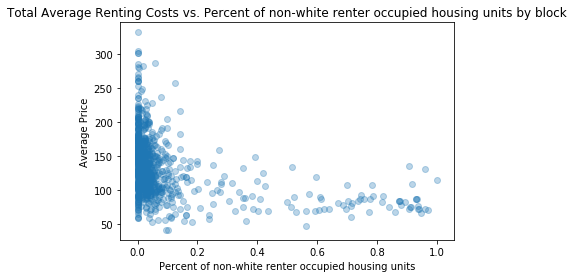

In [16]:
plt.scatter(relevantdata2["Percent of non-white renter occupied housing units"], relevantdata2["Total renter occupied housing units average monthly contract rent"], alpha=0.3)
plt.title('Total Average Renting Costs vs. Percent of non-white renter occupied housing units by block')
plt.xlabel('Percent of non-white renter occupied housing units')
plt.ylabel('Average Price')
plt.show()

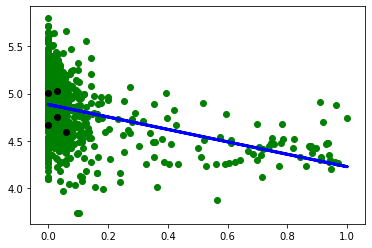

Coefficients: 
 [-0.65875691]
Mean squared error: 0.03
Coefficient of determination: -0.04
Coefficient of determination: 0.15


In [18]:
non_white = pd.DataFrame()

non_white["nonwhite"] = relevantdata2["Percent of non-white renter occupied housing units"]
non_white["avcost"] = relevantdata2["Total renter occupied housing units average monthly contract rent"]

non_white

#Convert to numpy array

X = non_white["nonwhite"].values
X = X.reshape(-1, 1)

Y = np.log(non_white["avcost"].values)

# Split the data into training/testing sets
X_train = X[:-5]
X_test = X[-5:]

# Split the targets into training/testing sets
Y_train = Y[:-5]
Y_test = Y[-5:]

#X_train

regr = linear_model.LinearRegression()



# Train the model using the training sets
regr.fit(X_train, Y_train)

# Make predictions using the testing set
Y_pred = regr.predict(X_test)

train_pred = regr.predict(X_train)
# Plot outputs
plt.scatter(X_train, Y_train, color = "green")
plt.scatter(X_test, Y_test,  color='black')
plt.plot(X_train, train_pred, color='blue', linewidth=3)

#plt.xticks(())
#plt.yticks(())

plt.show()

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(Y_test, Y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(Y_test, Y_pred))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(Y_train, train_pred))